In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
corredores = pd.read_csv('corredores.csv')
corridas = pd.read_csv('corridas.csv')


In [3]:
corredores.head()

,corredores.id-corredor,corredores.ageGroup,corredores.fullname,corredores.uri,corredores.nationality,corredores.sex,corredores.Club,corredores.Team,corredores.Sponsor(s),corredores.Description,corredores.Geral,corredores.20K,corredores.50K,corredores.100K,corredores.100m
0,5444,65-69,Michael John DE FREITAS,5444.michaeljohn.defreitas,BR,H,NaN,NaN,NaN,NaN,341.0,NaN,341.0,NaN,NaN
1,12619,40-44,Fernanda MACIEL,12619.fernanda.maciel,BR,F,NaN,NaN,The North Face,NaN,585.0,NaN,586.0,NaN,NaN
2,20086,55-59,Andre ARRUDA,20086.andre.arruda,BR,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20087,50-54,Ribeiro SANTOS-DECIO,20087.ribeiro.santosdecio,BR,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20839,50-54,Adriano BURAGAS,20839.adriano.buragas,BR,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
corredores_idade = corredores['corredores.ageGroup']
tabela_idade = corredores_idade.value_counts()
tabela_idade['0-20'] = tabela_idade['U18'] + tabela_idade['U20']
tabela_idade = tabela_idade.drop(['U18', 'U20'])
tabela_idade = tabela_idade.sort_index()

In [5]:
azul_claro = '#73BFA7'
azul_escuro = '#3494BA'

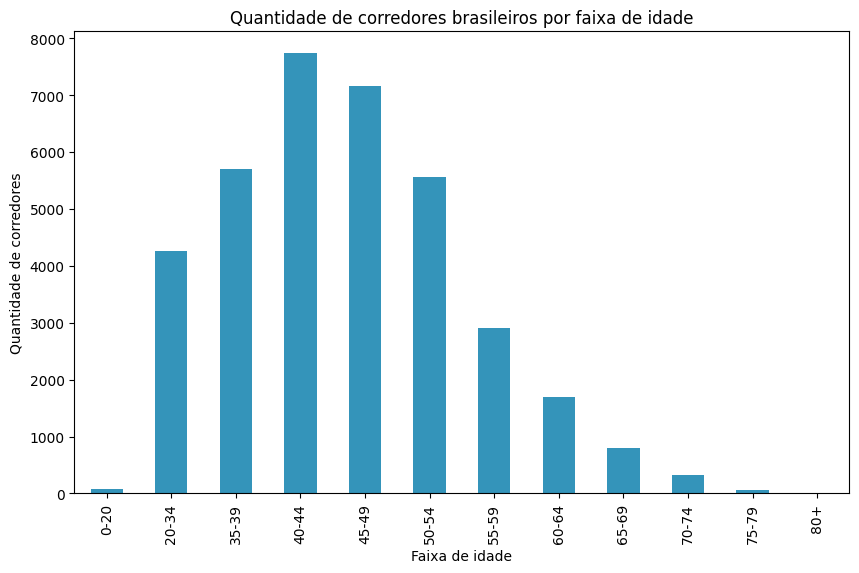

In [6]:
tabela_idade.plot(kind='bar', color=azul_escuro, xlabel='Faixa de idade', ylabel='Quantidade de corredores', title='Quantidade de corredores brasileiros por faixa de idade', figsize=(10, 6))
plt.show()

In [7]:
corridas_nao_br = pd.read_csv('corridas_nao_brasileiras.csv')
corridas_nao_br.head()

,id-corrida,City / Country,qtd_Br
0,179,France,1
1,217,France,2
2,220,France,5
3,264,Italy,1
4,274,France,2


In [13]:
corridas_nao_br['City / Country'].value_counts()

City / Country
Portugal                  235
France                    231
Argentina                 188
Spain                     151
United States             143
                         ... 
Terrebonne                  1
Aguamansa (La Orotava)      1
Vilaflor                    1
Candelaria                  1
Sabadell                    1
Name: count, Length: 423, dtype: int64

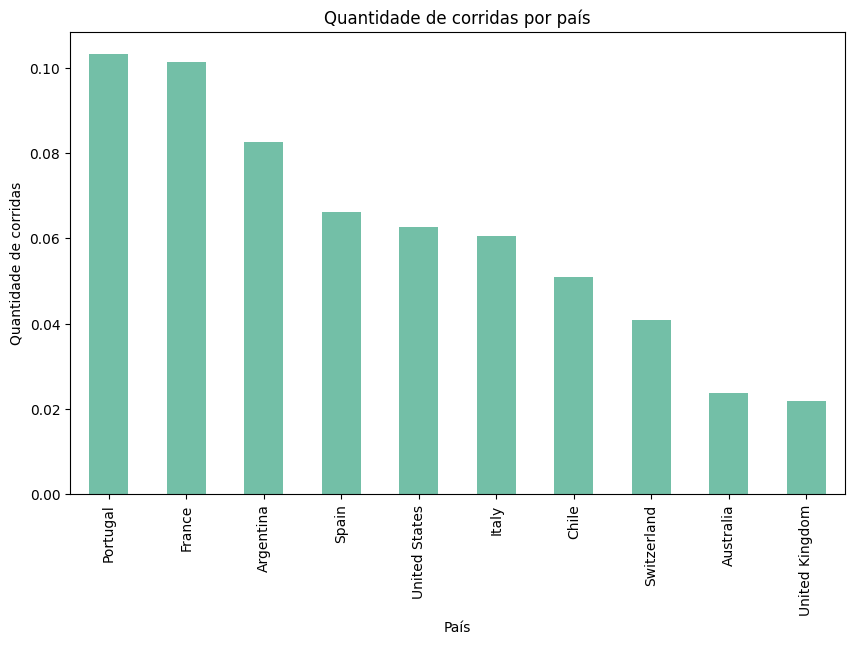

In [14]:
corridas_nao_br['City / Country'].value_counts(normalize=True).head(10).plot(kind='bar', color=azul_claro, xlabel='País', ylabel='Quantidade de corridas', title='Quantidade de corridas por país', figsize=(10, 6))
plt.show()

##   Corredores ativos (que correram nos últimos 3 meses) por faixa de idade

In [15]:
corredores_ativos = pd.read_csv('corredores_ativos.csv')

In [16]:
corredores_ativos_idade = corredores_ativos['corredores.ageGroup']
tabela_idade_ca = corredores_ativos_idade.value_counts()
tabela_idade_ca['0-20'] = tabela_idade_ca['U18'] + tabela_idade_ca['U20']
tabela_idade_ca = tabela_idade_ca.drop(['U18', 'U20'])
tabela_idade_ca = tabela_idade_ca.sort_index()

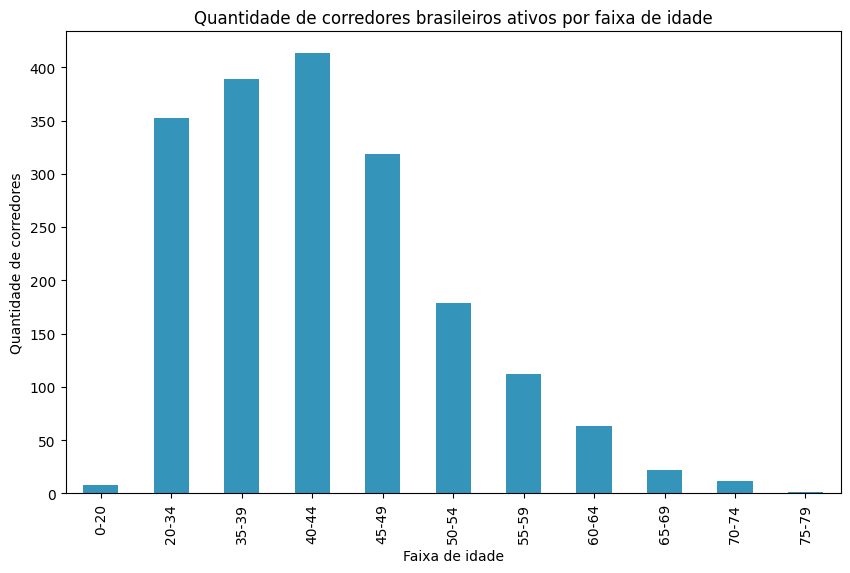

In [17]:
tabela_idade_ca.plot(kind='bar', color=azul_escuro, xlabel='Faixa de idade', ylabel='Quantidade de corredores', title='Quantidade de corredores brasileiros ativos por faixa de idade', figsize=(10, 6))
plt.show()

##   Corredores ativos (que correram nos últimos 3 meses) por sexo

In [22]:
corredores_ativos_sexo = corredores_ativos['corredores.sex']
corredores_ativos_sexo.replace('H', 'Masculino', inplace=True)
corredores_ativos_sexo.replace('F', 'Feminino', inplace=True)
contagem_sexo = corredores_ativos_sexo.value_counts()

contagem_sexo

corredores.sex
Masculino    1287
Feminino      583
Name: count, dtype: int64

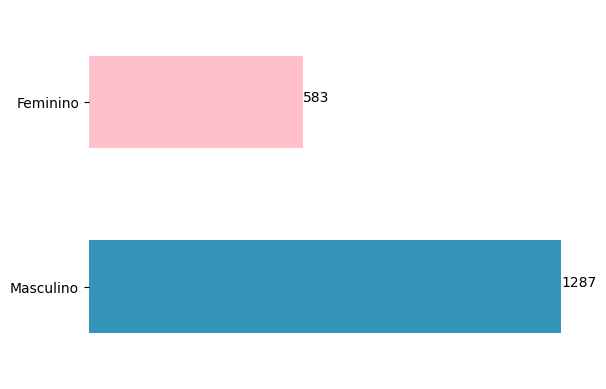

In [43]:
cores = [azul_escuro, 'pink'] 
contagem = contagem_sexo.plot(kind='barh', color=cores, edgecolor='none')
# plt.title('Corredores Ativos por Sexo')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
for index, value in enumerate(contagem_sexo):
    contagem.text(value, index, str(value))
contagem.set_frame_on(False)
contagem.set_xticks([])
plt.show()

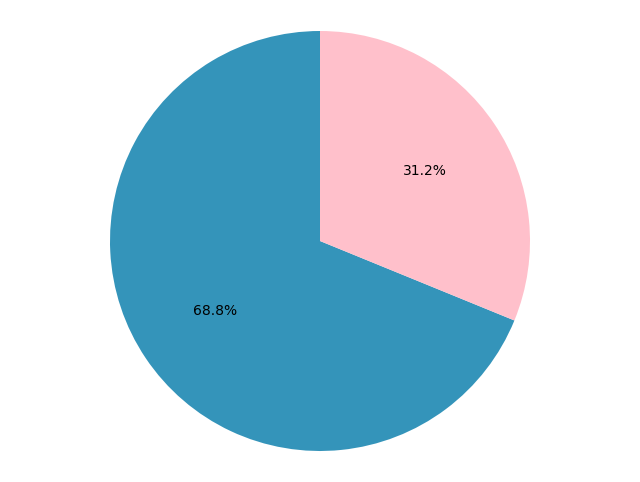

In [29]:
plt.figure(figsize=(8, 6))
cores = [azul_escuro, 'pink']  
plt.pie(contagem_sexo, colors=cores, autopct='%1.1f%%', startangle=90)
# plt.title('Corredores Ativos por Sexo')
plt.axis('equal') 
plt.show()